In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime, timedelta
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import optuna
import sklearn

/mnt/c/Users/DustinLamblin/programming/coding/project/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# AREA OF IMPROVEMENT
- Pick different model
- Pick different score
- Automated hyper parameter tuning
- UI interface load excel file and show result

In [20]:
from pathlib import Path
FOLDER_PATH = Path.cwd().parent / "input_data"

In [21]:
print(FOLDER_PATH)

/mnt/c/Users/DustinLamblin/programming/coding/project/input_data


In [22]:
input_data=pd.read_csv(FOLDER_PATH / "happiness.csv")


In [23]:
import pickle
from wellness_app.tuning_model.optimization import fit_simple_random_forest
happiness_model=fit_simple_random_forest(input_data)
filename = 'happiness_model.sav'
pickle.dump(happiness_model, open(filename, 'wb'))

In [10]:
productivity_model

RandomForestClassifier(class_weight='balanced', max_depth=5)

In [13]:
from wellness_app.model_analysis.analysis import get_features_importances
from wellness_app.tuning_model.optimization import fit_simple_random_forest,prepare_datasets
X_train,_,_,_=prepare_datasets(input_data)
features=get_features_importances(productivity_model,X_train)

<AxesSubplot:>

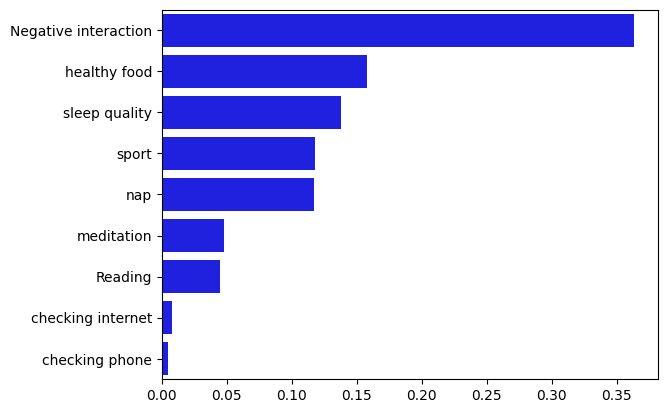

In [17]:
sns.barplot(x=features.values,y=features.index,color="b")


In [19]:
len(features)

9

In [ ]:
shap_values = shap.TreeExplainer(top_model).shap_values(X_train)fig_shap_values=shap.summary_plot(shap_values, X_train, plot_type="bar")

In [18]:
features.index[0]

'Negative interaction'

In [21]:
input_data.describe().T

,count,mean,std,min,25%,50%,75%,max
interm_fasting,32.0,0.50000,0.508001,0.0,0.00,0.5,1.0,1.0
qlty_sleep,32.0,0.59375,0.756024,-1.0,0.75,1.0,1.0,1.0
sport,32.0,0.56250,0.504016,0.0,0.00,1.0,1.0,1.0
healthy_food,32.0,0.68750,0.592289,-1.0,0.75,1.0,1.0,1.0
meditation,32.0,0.90625,0.296145,0.0,1.00,1.0,1.0,1.0
estomac_problem,32.0,-0.31250,0.470929,-1.0,-1.00,0.0,0.0,0.0
external_factor,32.0,-0.15625,0.368902,-1.0,0.00,0.0,0.0,0.0
journaling_mng,32.0,0.34375,0.482559,0.0,0.00,0.0,1.0,1.0
self_dev,32.0,0.81250,0.396558,0.0,1.00,1.0,1.0,1.0
meetings,32.0,0.43750,0.504016,0.0,0.00,0.0,1.0,1.0


In [28]:
import pandas as pd
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

def prepare_datasets(inut_data):
    X = inut_data.iloc[:, 1:-1]
    y = inut_data.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)
    return X_train, y_train, X_test, y_test

def tuning_hyperparamter(input_data):
    X_train, y_train, X_test, y_test=prepare_datasets(input_data)
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]
    max_features = ['auto', 'sqrt']
    max_depth = [int(x) for x in np.linspace(2, 10)]
    min_samples_split = [2,3,4,5]
    min_samples_leaf = [1, 2,3, 4]
    bootstrap = [True, False]
    random_grid = {
        'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap
    }
    rf = RandomForestClassifier()
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100)
    # Fit the random search model
    rf_random.fit(X_train, y_train)

In [29]:
tuning_hyperparamter(input_data)

/home/dlamblin/.cache/pypoetry/virtualenvs/crypto-portfolio-fzEOh7Pd-py3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/home/dlamblin/.cache/pypoetry/virtualenvs/crypto-portfolio-fzEOh7Pd-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/dlamblin/.cache/pypoetry/virtualenvs/crypto-portfolio-fzEOh7Pd-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is 

KeyboardInterrupt: 

<AxesSubplot: >

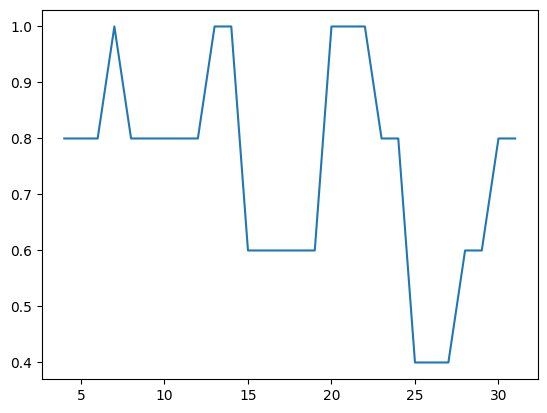

In [19]:
input_data.iloc[:,-1].rolling(window=5).mean().plot()

In [16]:
input_data.iloc[:,-1].mean()

0.75

In [ ]:
sns.histplot(input_data.iloc[:,-1])

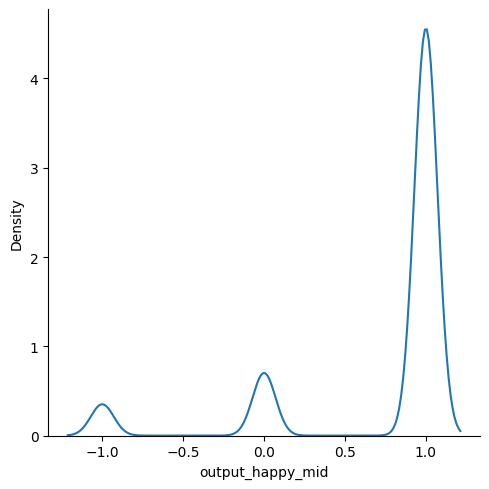

In [18]:
sns.displot(input_data, x=target_name, kind="kde", bw_adjust=.25)

In [4]:
input_data=pd.read_csv("input_data/productivity.csv")
X_train, y_train, X_val, y_val, X_test, y_test=prepare_datasets(input_data)

FileNotFoundError: [Errno 2] No such file or directory: 'input_data/productivity.csv'

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def tune_hyperparameters(trial):
    classifier_name = trial.suggest_categorical("classifier", ["RandomForest"])
    if classifier_name == "RandomForest":
        max_depth = trial.suggest_int("max_depth", 2, 10,step=2)
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 3)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 5)
        classifier_obj =RandomForestClassifier(
            max_depth=max_depth, min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split,n_estimators=350,class_weight="balanced"
        )
    classifier_obj.fit(X_train, y_train)
    y_pred_train= classifier_obj.predict(X_train)
    y_pred_val= classifier_obj.predict(X_val)
    precision_validation=sklearn.metrics.f1_score(y_val,y_pred_val,average="macro")
    return precision_validation
crypto_metrics=[]
study = optuna.create_study(directions=["maximize"])
study.optimize(tune_hyperparameters, n_trials=100)
print(study.best_trials)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
top_model_productivity=RandomForestClassifier(max_depth= 6, min_samples_leaf=1, min_samples_split= 2,n_estimators=350,class_weight="balanced")
top_model_productivity.fit(X_train, y_train)
y_pred_train= top_model_productivity.predict(X_train)
y_pred_val= top_model_productivity.predict(X_val)
cfn_train=confusion_matrix(y_pred_train,y_train,normalize="pred")
cfn_val=confusion_matrix(y_pred_val,y_val,normalize="pred")
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cfn_train,display_labels=top_model_productivity.classes_)
disp.plot()
plt.show()

In [ ]:
X_train

In [ ]:
import shap
import shap
shap_values = shap.TreeExplainer(top_model_productivity).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values[2],X_train, plot_type="violin")

In [ ]:
from dtreeviz.trees import dtreeviz
dtreeviz(top_model_productivity.estimators_[0], X_train, y_train, feature_names=X_train.columns)

In [ ]:
# HAPINESS

In [ ]:
input_data_hapiness=pd.read_csv("input_data/hapiness.csv")
X_train, y_train, X_val, y_val, X_test, y_test=prepare_datasets(input_data_hapiness)

In [ ]:
input_data_hapiness

In [ ]:
def tune_hyperparameters(trial):
    classifier_name = trial.suggest_categorical("classifier", ["RandomForest"])
    if classifier_name == "RandomForest":
        max_depth = trial.suggest_int("max_depth", 2, 10,step=2)
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 3)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 5)
        classifier_obj =RandomForestClassifier(
            max_depth=max_depth, min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split,n_estimators=350,class_weight="balanced"
        )
    classifier_obj.fit(X_train, y_train)
    y_pred_train= classifier_obj.predict(X_train)
    y_pred_val= classifier_obj.predict(X_val)
    precision_validation=sklearn.metrics.f1_score(y_val,y_pred_val,average="macro")
    return precision_validation
crypto_metrics=[]
study = optuna.create_study(directions=["maximize"])
study.optimize(tune_hyperparameters, n_trials=100)
print(study.best_trials)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
top_model_happiness=RandomForestClassifier(max_depth= 6, min_samples_leaf=1, min_samples_split= 4,n_estimators=350,class_weight="balanced")
top_model_happiness.fit(X_train, y_train)
y_pred_train= top_model_happiness.predict(X_train)
y_pred_val= top_model_happiness.predict(X_val)
cfn_train=confusion_matrix(y_pred_train,y_train,normalize="pred")
cfn_val=confusion_matrix(y_pred_val,y_val,normalize="pred")
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cfn_train,display_labels=top_model_productivity.classes_)
disp.plot()
plt.show()

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cfn_val,display_labels=top_model_productivity.classes_)
disp.plot()
plt.show()

In [ ]:
feature_imp=pd.Series(top_model_happiness.feature_importances_,index=X_train.columns).sort_values(ascending=False)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.legend()

In [ ]:
shap_values = shap.TreeExplainer(top_model_happiness).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
top_model_happiness.estimators_[0]

In [ ]:
from sklearn import tree
tree.plot_tree(top_model_happiness)